In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [8]:
df = pd.read_json(
    "my-beers.json",
)
df[['main style', 'sub style']] = df['style'].str.split(' - ', expand=True)

df

,imageUrl,beer,beerUrl,brewery,breweryUrl,style,myRating,globalRating,abv,ibu,main style,sub style
0,https://assets.untappd.com/site/beer_logos/bee...,Czech Desitka,https://untappd.com/b/salden-s-brewery-czech-d...,Salden's Brewery,https://untappd.com/Saldens,Pilsner - Czech / Bohemian,4.50,3.60,4.5,10,Pilsner,Czech / Bohemian
1,https://assets.untappd.com/site/beer_logos/bee...,Peach Orange Punch Mead,https://untappd.com/b/steppe-and-wind-meadery-...,Steppe & Wind Meadery (Степь и Ветер),https://untappd.com/SteppeNwind,Mead - Other,3.00,4.07,9.0,0,Mead,Other
2,https://assets.untappd.com/site/beer_logos/bee...,Cherry Mead,https://untappd.com/b/steppe-and-wind-meadery-...,Steppe & Wind Meadery (Степь и Ветер),https://untappd.com/SteppeNwind,Mead - Melomel,4.25,4.03,6.0,0,Mead,Melomel
3,https://assets.untappd.com/site/beer_logos/bee...,Pauwel Kwak,https://untappd.com/b/brouwerij-bosteels-pauwe...,Brouwerij Bosteels,https://untappd.com/BosteelsBrewery,Pale Ale - Belgian,4.00,3.77,8.4,20,Pale Ale,Belgian
4,https://assets.untappd.com/site/beer_logos/bee...,Белое крыло,https://untappd.com/b/gurin-craft-beloe-krylo/...,Gurin Craft,https://untappd.com/GurinCraft,Mead - Metheglin,4.25,4.01,6.0,0,Mead,Metheglin
...,...,...,...,...,...,...,...,...,...,...,...,...
239,https://assets.untappd.com/site/beer_logos/bee...,Magnum Weissbier,https://untappd.com/b/magnum-brew-magnum-weiss...,MAGNUM BREW,https://untappd.com/MAGNUM__76,Wheat Beer - Hefeweizen,4.00,3.70,5.2,12,Wheat Beer,Hefeweizen
240,https://assets.untappd.com/site/beer_logos/bee...,Albicocca,https://untappd.com/b/hops-farm-brewery-albico...,Hops Farm Brewery,https://untappd.com/HopsFarmBrewery,Belgian Blonde,4.25,3.79,6.5,18,Belgian Blonde,None
241,https://assets.untappd.com/site/beer_logos/bee...,ПАНЧО,https://untappd.com/b/kulinar-pancho/5209954,КУЛИNAR,https://untappd.com/krajonster,Sour - Smoothie / Pastry,3.50,4.34,6.0,0,Sour,Smoothie / Pastry
242,https://assets.untappd.com/site/beer_logos/bee...,IPA,https://untappd.com/b/hard-rock-brewery-hard-r...,Hard Rock Brewery,https://untappd.com/HardRockBrewery,IPA - American,3.75,3.89,5.5,55,IPA,American


In [62]:
df[['style', 'main style', 'sub style']].to_excel('styles.xlsx')


In [65]:
import sqlite3
from sqlalchemy import create_engine

# Create a connection to the SQLite database
engine = create_engine('sqlite:///my_database.db')

# Write the DataFrame to the SQLite database
df.to_sql('my_table', engine, if_exists='replace', index=False)


244

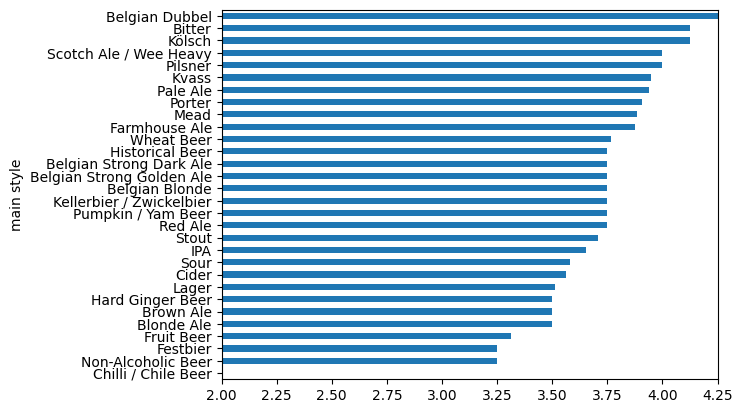

In [16]:
# Calculate the mean 'myRating' for each 'main style' and sort by 'myRating'
mean_ratings = df.groupby('main style')['myRating'].mean().sort_values()

# Plot the mean 'myRating' for each 'main style'
ax = mean_ratings.plot(kind='barh')

# Set the x-axis to start from the maximum mean 'myRating'
ax.set_xlim([mean_ratings.min(), mean_ratings.max()])

# Show the plot
plt.show()


<Axes: ylabel='main style'>

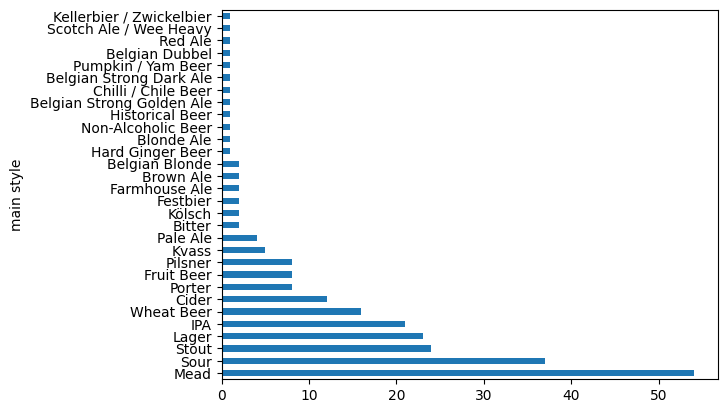

In [17]:
# Count the number of occurrences for each 'main style'
amount = df['main style'].value_counts()

# Plot the count of 'main style'
amount.plot(kind='barh')


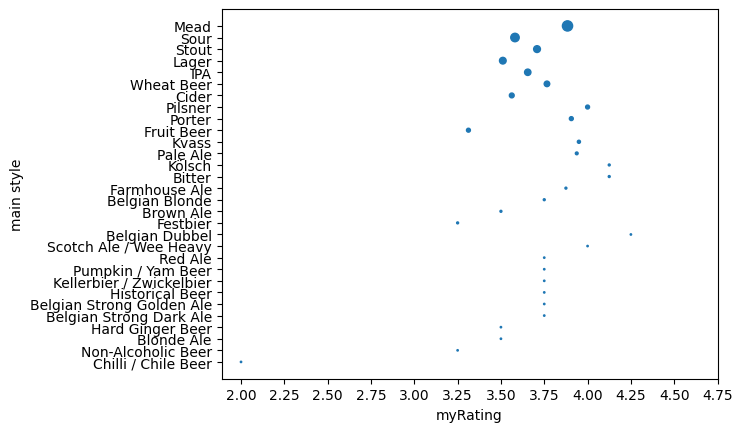

In [46]:
# Count the number of occurrences for each 'main style'
amount = df['main style'].value_counts()

# Convert the Series to a DataFrame
amount = amount.reset_index()
amount.columns = ['main style', 'amount']

# Calculate the mean 'myRating' for each 'main style'
mean_ratings = df.groupby('main style')['myRating'].mean()

# Convert the Series to a DataFrame
mean_ratings = mean_ratings.reset_index()
mean_ratings.columns = ['main style', 'myRating']

# Merge the two DataFrames on 'main style'
df_merged = pd.merge(mean_ratings, amount, on='main style')
df_merged = df_merged.sort_values(by=['amount', 'myRating'])

# Create a scatter plot with 'main style' on the x-axis, 'myRating' on the y-axis, and 'amount' as the size of the markers
scatter=df_merged.plot.scatter( x='myRating',y='main style', s='amount', )


plt.xticks(np.arange(df_merged['myRating'].min(),5, 0.25))
plt.show()

